#  Predicting Sales from Advertising Spend

## Problem Statement:
HINA Inc. is a large FMCG company that is streamlining its marketing budget.This involves taking stock of all its marketing strategies. This, in turn, means re-assessing 
the effectiveness of its existing spend on various marketing channels. As a marketing data analyst,you need to figure out if spending money on TV advertising campaigns results in a direct increase
in sales. In other words, you need to find out if the TV advertising spend and the sales figures share
a linear relationship and how strong that relationship is.


### Importing modules

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Ingesting the data file using pandas module

In [20]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Looking the data structure 

In [21]:
#To see rows and columns in the data
data.shape

(200, 4)

In [22]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Data Wrangling

### Find and handle missing  values

In [24]:
missing_data = data.isnull()
missing_data.head()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [25]:
# printing all the column names in the missing data and then counting and printing missing data count
for column in list(missing_data.columns):
    print(column)  # It will print all the column names
    print(missing_data[column].value_counts()) #It will count the data values 


TV
False    200
Name: TV, dtype: int64
Radio
False    200
Name: Radio, dtype: int64
Newspaper
False    200
Name: Newspaper, dtype: int64
Sales
False    200
Name: Sales, dtype: int64


### By Looking these results it is clear that this data is clean and does not contain any missing values

## 1-  Exploring the relationships using plots.

## Analysis between the Individual campaign spends and the Sales.

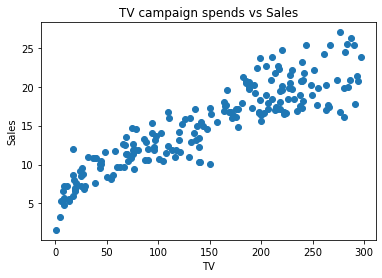

In [26]:
# Using matplotlib plotting the relationship
plt.scatter(x=data['TV'], y=data['Sales'])
plt.title('TV campaign spends vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

#### Plot between TV compaign and Sales shows that they have a  linear relationship

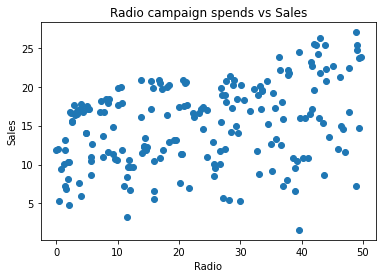

In [27]:
# Relationship between Radio compeign and sales
plt.scatter(x=data['Radio'], y=data['Sales'])
plt.title('Radio campaign spends vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

#### Plot between Radio and Sales shows that they  have a non-linear relationship

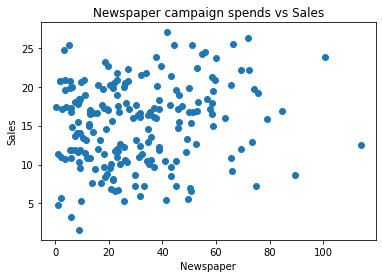

In [28]:
# Using matplotlib plotting the relationship
plt.scatter(x=data['Newspaper'], y=data['Sales'])
plt.title('Newspaper campaign spends vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

#### Plot between Newspaper and Sales shows that they have a non-linear relationship

## 2- Exploring relationships strength using numbers - correlation

In [29]:
# Correlation matrix between TV and Sales variables
np.corrcoef(data['TV'], data['Sales'])

array([[1.        , 0.90120791],
       [0.90120791, 1.        ]])

### Very strong relationship between TV compaign and Sales

In [30]:
# Correlation matrix between Radio and Sales variables
np.corrcoef(data['Radio'], data['Sales'])

array([[1.       , 0.3496311],
       [0.3496311, 1.       ]])

### Weak positive relationship between Radio compaign and Sales

In [31]:
# Correlation matrix between Newspaper and Sales variables
np.corrcoef(data['Newspaper'], data['Sales'])

array([[1.        , 0.15796003],
       [0.15796003, 1.        ]])

### Very weak positive relationship between Newspaper campaign and Sales

## Correlation of all variables in a matrix

In [32]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


### Using Seaborn module to plot the correlation 


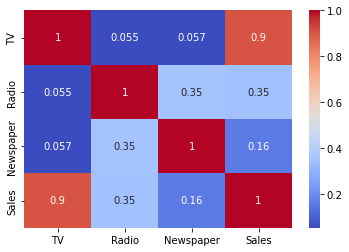

In [33]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

### By looking at the correlation plot it is clear that TV compaign and Sales are highly correlated  but newspaper and Radio compaign have a weak correlation with the sales. 

## 3- Determining  if the individual features are statistically significant relative to the Sales by getting the p-values for the features.



## hypothesis
#### ho = "There is a relationship linear relationship between TV/Radio/Newspaper compaign and Sales"
#### h1 = "There is non-linear relationship between TV/Radio/Newspaper compaign and Sales"
#### significance level = 0.05

## Calculating p-value for all three advertising compaigns and Sales

In [15]:
pearson_coef, p_value = stats.pearsonr(data['TV'], data['Sales'])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a p_value of P = {p_value}")


The Pearson Correlation Coefficient is 0.9012079133023309 with a p_value of P = 7.927911625320818e-74


## Conclusion

#### Since the P-Value < 0.05 the correlation between TV advertising compaign and Sales is statistically significant, and the linear relationship is very very strong of 0.901208


In [16]:
pearson_coef, p_value = stats.pearsonr(data['Radio'], data['Sales'])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a p_value of P = {p_value}")

The Pearson Correlation Coefficient is 0.3496310970076692 with a p_value of P = 3.882892364494171e-07


## Conclusion

#### Since the P-Value < 0.05 the correlation between Radio advertising compaign and Sales is statistically significant, and the linear relationship is not very strong of 0.349361

In [34]:
pearson_coef, p_value = stats.pearsonr(data['Newspaper'], data['Sales'])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a p_value of P = {p_value}")

The Pearson Correlation Coefficient is 0.15796002615492633 with a p_value of P = 0.025487444306997908


## Conclusion

#### Since the P-Value < 0.05 the correlation between Newspaper advertising compaign and Sales is statistically significant, and the linear relationship is  very very weak of 0.157960

## 4. Discuss the possibility of Correlation, Causation or both between the individual features and the Sales.

#### 1. From the correlation metrix it is clear that TV adversting compaign and Sales have a high positive correlation and we can say that TV advertising compaign are causing more sales
#### 2. From the correlation metrix it is clear that Radio and Newspaper adversting compaign and Sales have a  positive weak correlation and but it is not sure are these compaign really causing the sales.